In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:943: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:955: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:988: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1000: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
No handles with labels found to put in legend.


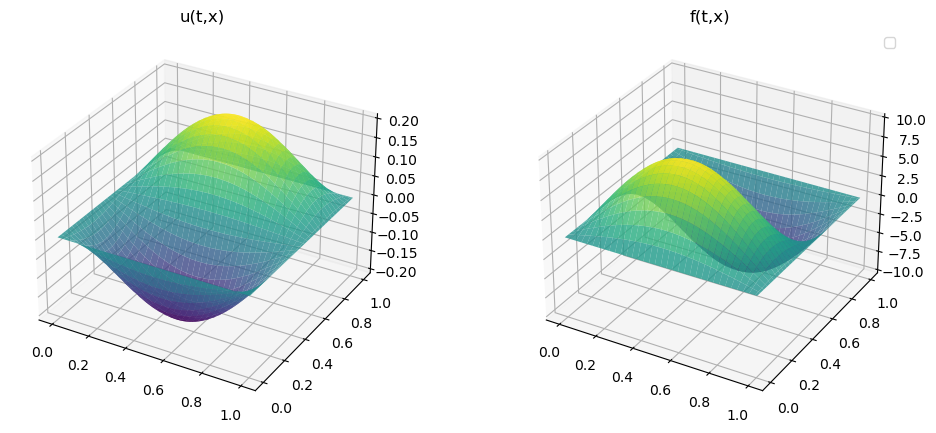

In [2]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 25, [1e-10,1e-10]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
model.plot_raw_data()

In [3]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 200
n_threads = -1
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
#model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)
model.train("TNC",n_restarts, n_threads,opt_params_dict)

100%|██████████| 200/200 [00:17<00:00, 11.57it/s]


     fun: -24.88775062561035
     jac: array([15.3125, -0.4375], dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 52
     nit: 3
  status: 1
 success: True
       x: array([0.45141332, 0.25644057])


In [4]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model.predict_model(X_star)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
GP with kernel: 
Training data: (25, 2)
Training targets: (50, 1)
Hyperparameters: {'l_x': 0.4514133161257999, 'sigma_f': 0.25644056926227493}
Log marginal likelihood: -24.88775062561035
Mean squared error: {'u': 3.147170559714141e-07, 'f': 0.0013231892371550202}
Relative l2 error: {'u': 0.005592230478523356, 'f': 0.007347885608673102}
-----------------------------------------------



 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:677: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:686: RuntimeWarning:invalid value encountered in sqrt


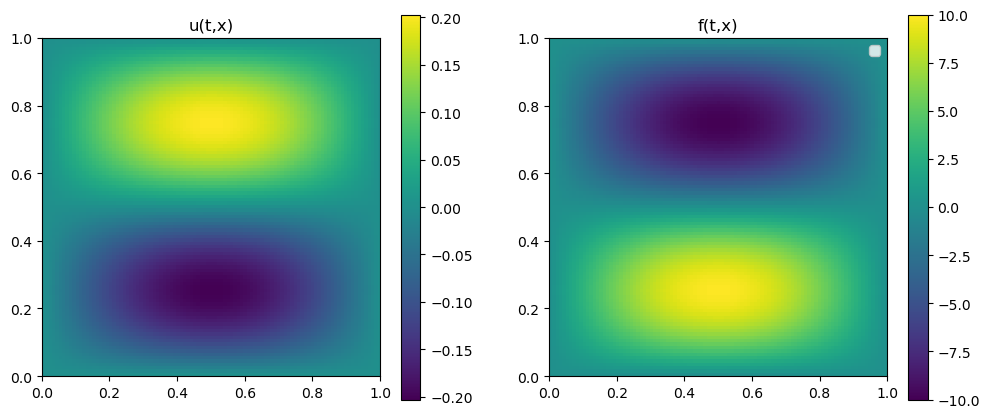

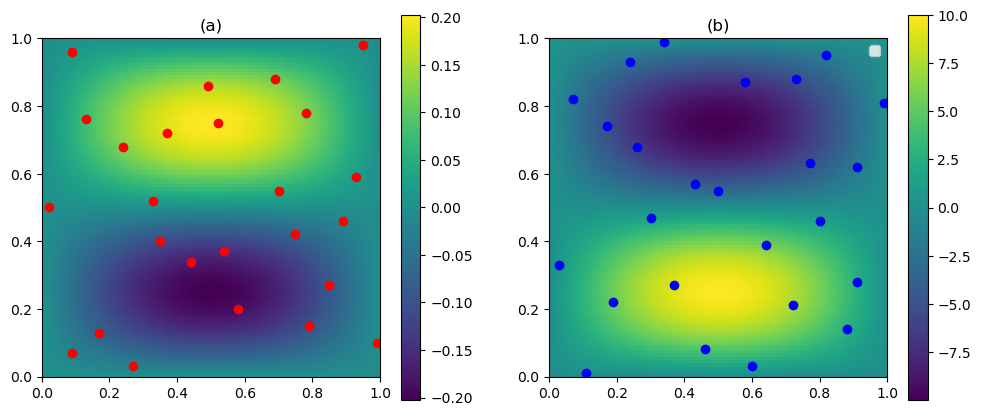

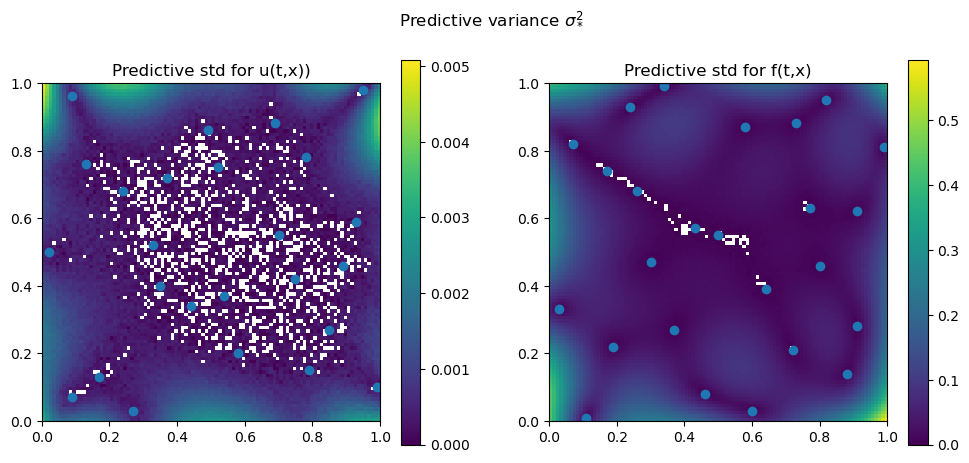

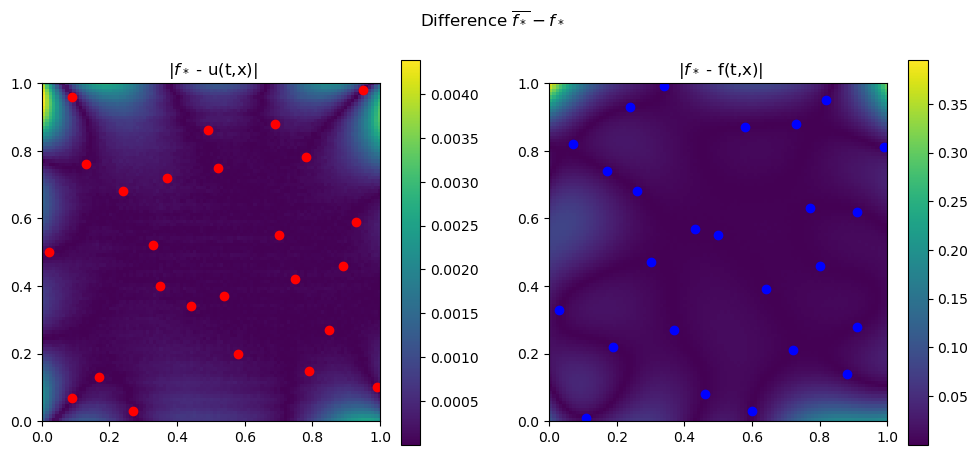

In [5]:
model.plot_raw_data(heat_map=True)
model.plot_prediction(X_star, "","predictive_mean.png",True)
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

In [6]:
#model.use_GPy(X_star,"gpy")
#model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
#model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

In [7]:
#model.set_axis_labels("x","t")
#model.plot_merged_2d_plots(X_star,"merged_2d_plots.png",figsize=(10,11))


In [8]:
#model.plot_GPYmeandiff(X_star,"GPy_mean_diff.png",figsize=(10,9))

(101, 101)
(101, 101)


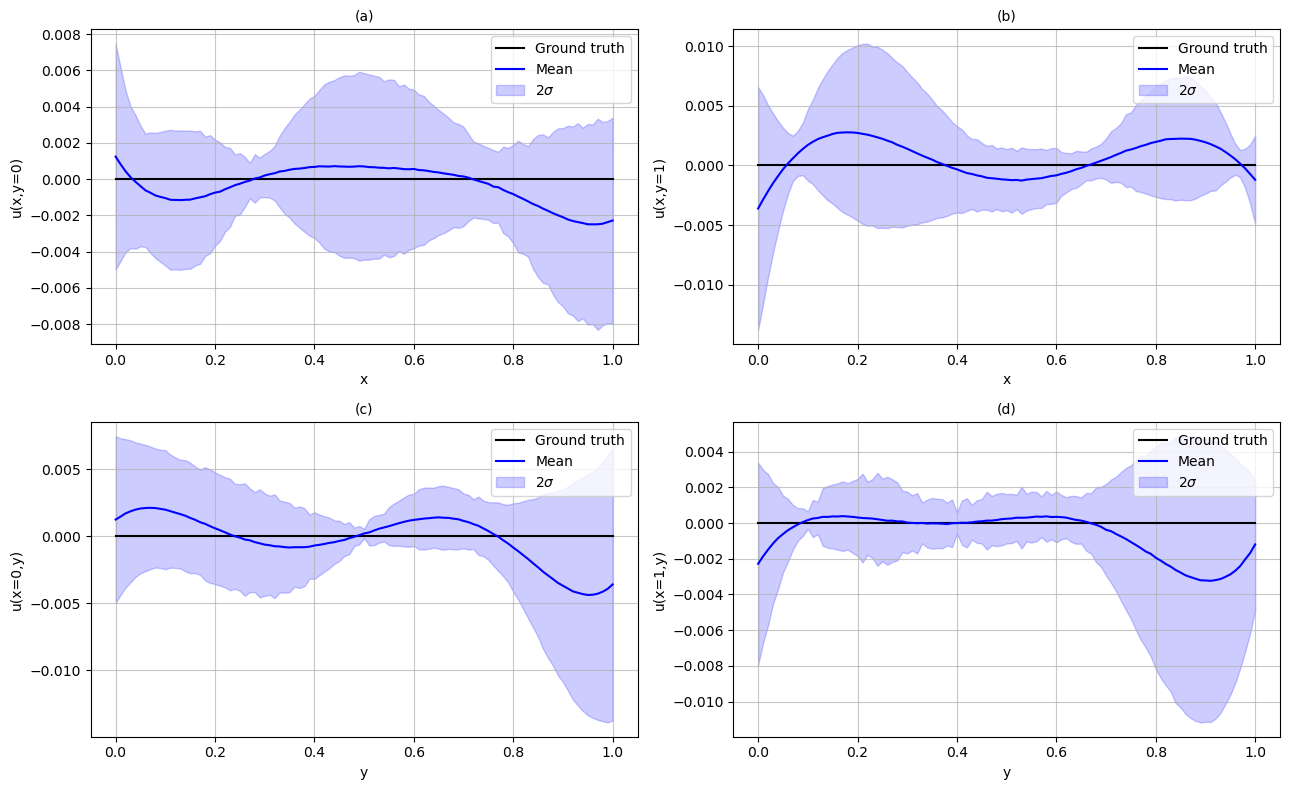

In [9]:
axis = [0,0,1,1]
index = [0,100,0,100]
model.set_axis_labels("x","y")
model.plot_1d_cut(axis,index,"boundaries.png")